In [1]:
# multigrid methods
# PDEs Relaxation
# Overrelaxation (finding the coefficients is the difficult part)
# Do first in cartesian (spherical is lots more work)
# compare to analytic solutions

## PHYS 481 Midterm

November 11, 2018

Kenneth Sharman (00300185)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Introduction

BLAH BLAH BLAH

Many important and interesting phenomena are modelled by functions of several variables that satisfy certain _partial differential equations_. These equations can be divided into initial value problems and boundary value problems. We will study the equation known as __Laplace's Equation__, which is a boundary value problem. A classic example of Laplace's equation is the problem of solving for the electric potential in electrostatics.

__Electrostatics__

Consider two of the most important equations in electrostatics. The electric field $\vec{E}$ and the electrostatic potential $V$ are related by $\vec{E} = - \vec{\nabla} V $. The differential form of Gauss's Law relates the volume charge density $\rho$ $ \big[ \frac{C}{m^3} \big]$ and the electric field by $\vec{\nabla} \cdot \vec{E} = \frac{\rho}{\epsilon_0}$, where $\epsilon_0$ is the electric permittivity of free space ($\epsilon_0 = 8.85 \times 10^{-12}\; C/Vm$).

In the absence of any electric charges we have $\vec{\nabla} \cdot \vec{E} = 0 \Rightarrow - \vec{\nabla} \cdot \vec{\nabla} V $. Expressing this in terms of the Laplace operator, or the full cartesian partial derivatives,

$$ \nabla^2 V = 0 \qquad \Longleftrightarrow \qquad \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} +  \frac{\partial^2 V}{\partial z^2} = 0 $$

which are the classic representations of Laplace's equation. The beauty and simplicity of Laplace's equation in electrostatics is found in the _Uniqueness Theorem_ which states that the solution to Laplace's equation in some volume $\Omega$ is uniquely determined if $V$ is specified on the boundary surface $\text{S}$. Thus, we can be assured that if a solution is found that is consistent with the imposed boundary conditions, we need not go any further, as this is the one and only solution to our problem.

When we studied this topic in electromagnetism, we began with the one-dimensional case and worked our way up to higher dimensions. We will use the same process in this analysis.

__Laplace 1D__

To begin, consider a system that independent of the cartesian $y$ and $z$ coordinates. The partial differential equation is dependent only on $x$ and assumes the form

$$  \frac{\partial^2 V}{\partial x^2} = 0 $$

Next, assume that the potential is known to have the following values at the boundary points

$$V(0) = 0 \qquad \text{and} \qquad V(1) = 1 $$

Solutions to Laplace's equation are known as harmonic functions. These functions have no local maxima or minima. In PHYS 455 we learned that this is equivalent to stating that $V(x)$ is the average of $V(x+a)$ and $V(x-a)$ for any $a$:

$$ V(x) = \frac{1}{2} \Big[ V(x+a) + V(x-a) \Big] $$

This result is a direction consequence of the method of finite differences, which approximates the value of a nth-order derivative using the Taylor Series expansion of that function.

To determine the solution we will use __The Relaxation Method__, which simply iterates the average value function. An initial guess is made of the the unknown variable $V(x)$, then this value is plugged into the right hand side of the equation to get a new value for $V(x)$. The process is repeated until $V(x)$ settles down to some fixed value. It has been proved$^1$ that this approach for solving the Laplace equation, also known as the __Jacobi Method__, is numerically stable and always gives a solution.

We will setup a one-dimensional array, representating the points of our system, intialize the endpoints with the given boundary conditions, and iterate the relaxation method until the potential at each point stops changing within the limits of accuracy desired for the solution. To implement this in code, a class will be defined with the appropriate attributes.

In [3]:
class ElectricPotential_1D:
    '''
    '''
    def __init__(self, left_point, right_point, left_bound_val, right_bound_val, grid_size, tol):
        '''
        '''
        self.x_vals = np.linspace(left_point, right_point, grid_size)
        self.v_vals = np.zeros(grid_size)
        self.v_prime = np.empty(len(self.v_vals))
        self.target = tol
        self.__init__set_boundary_conditions(left_bound_val, right_bound_val)
        
    def __init__set_boundary_conditions(self, left_bound_val, right_bound_val):
        '''
        '''
        self.v_vals[0] = left_bound_val
        self.v_vals[-1] = right_bound_val
        
    def iterate_relaxation(self, plot=False):
        '''
        '''
        count, delta, return_list = 0, 1.0, []

        while True:
            self.v_prime[0], self.v_prime[-1] = self.v_vals[0], self.v_vals[-1]
            self.v_prime[1:-1] = ( self.v_vals[0:-2] + self.v_vals[2:] ) / 2.0
            self.v_vals, self.v_prime = self.v_prime, self.v_vals
            delta = max(abs(self.v_vals - self.v_prime))
            
            if (count % (1000) == 0) and plot== True:
                return_list.append([np.copy(self.v_vals), count])
            
            count += 1
            if delta < self.target: break
        
        return return_list if plot==True else count

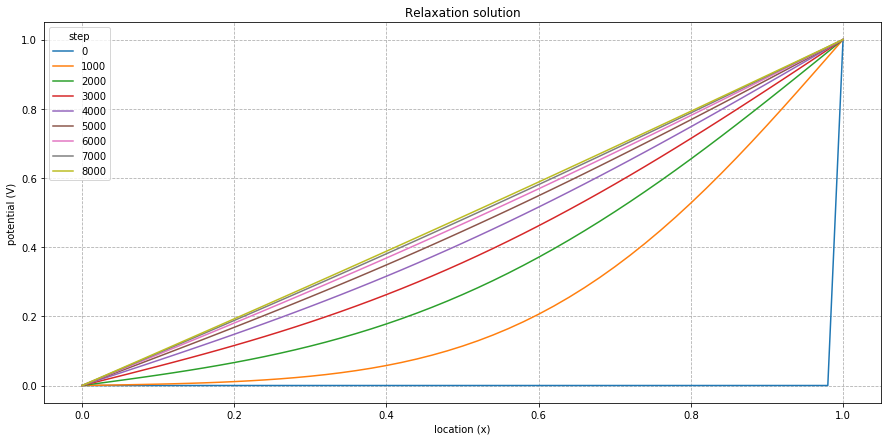

In [11]:
one_dim_system = ElectricPotential_1D(0.0, 1.0, 0.0, 1.0, 101, 1e-5)
nstep_solns = one_dim_system.iterate_relaxation(True)

plt.figure(figsize=(15, 7)) # Set the plot size
ax = plt.subplot()

for soln in nstep_solns:
    plt.plot(one_dim_system.x_vals, soln[0], label=str(soln[1]))

ax.legend(title='step')
ax.set_xlabel('location (x)')
ax.set_ylabel('potential (V)')
ax.set_title('Relaxation solution')
plt.grid(linestyle='dashed') # Add grid with dashed lines to graph
plt.show()

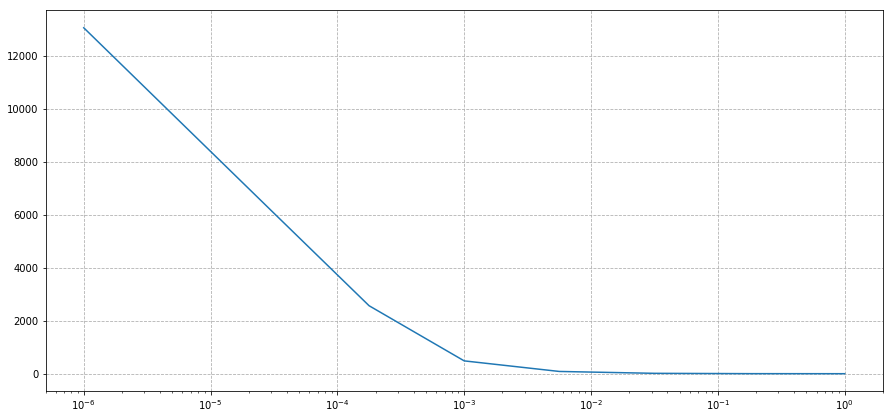

In [7]:
tolerances = np.geomspace(1e-6, 1, num=9)
iteration_counts = []

for tol in tolerances:
    elecstatic_system = ElectricPotential_1D(0.0, 1.0, 0.0, 1.0, 101, tol)
    iteration_counts.append(elecstatic_system.iterate_relaxation())

plt.figure(figsize=(15, 7)) # Set the plot size
ax = plt.subplot()
plt.plot(tolerances, iteration_counts)
ax.set_xscale('log') # Semilog scale
plt.grid(linestyle='dashed') # Add grid with dashed lines to graph

# Number of iterations is exponentially related to the tolerance

### References

[1] http://www.cs.unipr.it/~bagnara/Papers/PDF/SIREV95.pdf